<a href="https://colab.research.google.com/github/Shriniwas18K/Mini-Projects/blob/main/computer%20vision%20and%20deep%20learning%20/semantic_segmentation_using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CNN model to be trained on 128x128 RGB images and corresponding 128x128 RGB masks

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

# Define the model using a list of layers
model = Sequential([
    # Encoder
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),

    # Decoder
    UpSampling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),

    UpSampling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),

    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),

    # Output layer
    Conv2D(3, (3, 3), activation='softmax', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 3)         │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,331,459 (5.08 MB)

 Trainable params: 1,331,459 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

### Create RGB mask for mango image and train CNN on it
##### Convert image to hsv color space and create mango mask

### open three images and train on it

In [ ]:
import cv2
import numpy as np

def pipeline(img):
  """
  Processes an input image to identify and highlight mango regions.

  Args:
    img: The input image as a NumPy array.

  Returns:
    An RGB image with the mango regions highlighted in green
    and resized RGB image of dimensions 128x128.
  """

  # Resize the image ensuring consistent color channels
  img = cv2.resize(img, (128, 128))
  if len(img.shape) != 3 or img.shape[2] != 3:  # Check if not RGB
      img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to RGB if needed

  # Convert to HSV color space
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  # Define HSV range for mango
  lower_mango = np.array([20, 50, 50])
  upper_mango = np.array([160, 255, 255])

  # Create a mask for the mango region
  mask = cv2.inRange(hsv, lower_mango, upper_mango)

  # Convert the mask to an RGB image
  rgb_mask = mask_to_rgb(mask)

  return rgb_mask,img

def mask_to_rgb(mask):
  """
  Converts a binary mask to an RGB image.

  Args:
    mask: A binary mask (numpy array).

  Returns:
    An RGB image with the masked region highlighted.
  """

  # Create an RGB image with the same dimensions as the mask
  rgb_mask = np.zeros_like(mask)
  rgb_mask = np.stack([rgb_mask] * 3, axis=-1)

  for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
      if mask[i, j] == 255:
        rgb_mask[i, j] = [0, 255, 0]  # Green color for the masked region

  return rgb_mask

dataset = ['mango.jfif', 'mango.jpg','download.jpg', 'mango2.jfif','mango1.jpg']

X_train = np.zeros((len(dataset), 128, 128, 3), dtype=np.float32)  # For images
Y_train = np.zeros((len(dataset), 128, 128, 3), dtype=np.float32)  # For masks

for i, file_name in enumerate(dataset):
    if i==5:break
    img = cv2.imread(file_name)
    rgb_mask,img = pipeline(img)

    # Normalize pixel values and store directly in the arrays
    X_train[i] = img / 255.0
    Y_train[i] = rgb_mask / 255.0

model.fit(X_train,Y_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.0517 - loss: 0.2803


### model prediction(actual mask and predicted mask)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


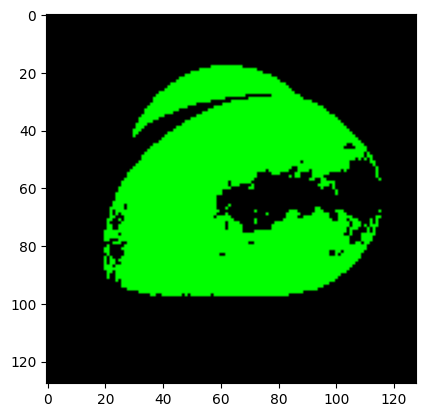

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
test_image=cv2.imread('mango1.jpg')
test_mask,test_image=pipeline(test_image)
predicted_mask=model.predict(np.array([test_image/255.0]))
plt.imshow(test_mask)
plt.show()

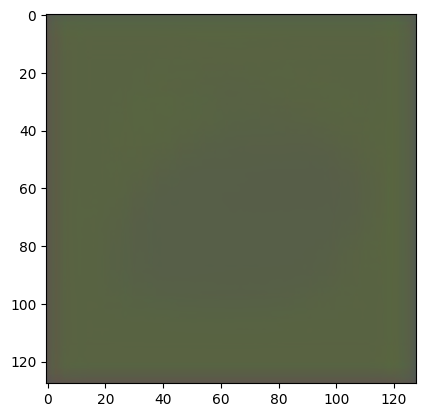

In [ ]:
plt.imshow(predicted_mask[0])
plt.show()